In [1]:
import numpy as np
import matplotlib.ticker as ticker
from scipy.optimize import linprog
import pandas as pd
import matplotlib.pyplot as plt

# Задание 1

## Пункт 1

#### 1. Решение задачи о нахождении выигрышной стратегии для антагонистической игры

In [2]:
def antagonistic_game(A_strtg, B_strtg, matrix):
    
    min_A = matrix.min(axis=1)
    min_B = matrix.max(axis=0)
    
    # максмин (выбрали наихудшее значение в каждой строке и из них нашли максимальное) - индекс максимального выигрыша игрока A
    opt_A_strtg = min_A.argmax()
    # минимакс (выбрали наилучшее значение в каждом столбце и из них нашли минимальное) - максимального проигрыша игрока B
    opt_B_strtg = min_B.argmin() 
    
    c = -np.array([1, 1, 1])
    A_ub = matrix
    b_ub = np.array([1, 1, 1])
    bounds = [[0, None], [0, None], [0, None]]

    m = linprog(c=c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method= "revised simplex")
    
    print(' a) Оптимальная чистая стратегия для игрока А: №' + str(opt_A_strtg + 1) + ' - ' + str(B_strtg[opt_A_strtg]) + '\n', 
          'б) Цена игры для игрока А при выборе чистой оптимальной стратегии (максимальный выигрыш):  ' + str(min_A[opt_A_strtg]) + '\n',
          'в) Стратегия для игрока Б при оптимальной стратегии А: №' + str(opt_B_strtg + 1) + ' - ' + str(B_strtg[opt_B_strtg]) + '\n',
          'г) Цена игры для игрока Б при оптимальной стратегии А (максимальный проигрыш): ' + str(min_B[opt_B_strtg]) + '\n', 
          'д) Таблица смешанных стратегий для игрока А: ' + str(m.x / -m.fun) + '\n', 
          'е) Цена игры для игрока А при выборе смешанной оптимальной стратегии: ' + str(1 / -m.fun) + '\n')

In [3]:
antagonistic_game(['Телефоны','Ноутбуки', 'ПК'], ['Телефоны', 'Наушники', 'Ноутбуки'], np.array([
    [300, 280, 230],
    [200, 180, 130],
    [240, 380, 400]
]))

 a) Оптимальная чистая стратегия для игрока А: №3 - Ноутбуки
 б) Цена игры для игрока А при выборе чистой оптимальной стратегии (максимальный выигрыш):  240
 в) Стратегия для игрока Б при оптимальной стратегии А: №1 - Телефоны
 г) Цена игры для игрока Б при оптимальной стратегии А (максимальный проигрыш): 300
 д) Таблица смешанных стратегий для игрока А: [0.73913043 0.         0.26086957]
 е) Цена игры для игрока А при выборе смешанной оптимальной стратегии: 281.73913043478257



# Пункт 2

**2. Решение задачи о нахождении выигрышной стратегии для биматричной игры**

In [4]:
def bimatrix_game(A_strtg, B_strtg, A, B):
    max_A = A.max(axis=0)
    min_A_strtg = max_A.argmin()
    
    min_B = B.min(axis=0)
    max_B_strtg = min_B.argmax()
    
    S_A = max_A[min_A_strtg]
    S_B = min_B[max_B_strtg]
    S = S_A + S_B
    
    c1 = -np.array([1, 1, 1])
    A_ub1 = A
    b_ub1 = np.array([1, 1, 1])
    bounds1 = [[0, None], [0, None], [0, None]]

    m1 = linprog(c=c1, A_ub=A_ub1, b_ub=b_ub1, bounds=bounds1, method= "revised simplex")

    c2 = np.array([1, 1, -1])
    A_ub2 = B
    b_ub2 = np.array([1, 1, 1])
    bounds2 = [[0, None], [0, None], [0, None]]

    m2 = linprog(c=c2, A_ub=A_ub2, b_ub=b_ub2, bounds=bounds2, method= "revised simplex")
    
    table_A = m2.x / -m2.fun
    table_B = m1.x / -m1.fun
    pr_B = ((table_A * B.T).T * table_B).sum()
    pr_A = 1 / - m1.fun

    print('  а) Оптимальная чистая стратегия для игрока А: №' + str(min_A_strtg + 1) + ' - ' + str(A_strtg[min_A_strtg]) + '\n ',
          'б) Цена игры для игрока А при выборе чистой оптимальной стратегии: ' + str(S_A) + '\n',
          ' в) Оптимальная чистая стратегия для игрока Б: №' + str(max_B_strtg + 1) + str(B_strtg[max_B_strtg]) + '\n',
          ' г) Цена игры для игрока Б при выборе чистой оптимальной стратегии: ' + str(S_B) + '\n' ,
          ' д) Общая (суммарная) цена игры: ' + str(S) + '\n' ,
          ' е) Таблица смешанных стратегий для компании А: ' + str(table_A) + '\n' ,
          ' ж) Цена игры для игрока А при выборе смешанной оптимальной стратегии: ' + str(pr_A) + '\n' ,
          ' з) Таблица смешанных стратегий для компании Б: ' + str(table_B) + '\n' ,
          ' и) Цена игры для игрока Б при выборе смешанной оптимальной стратегии: ' + str(pr_B) + '\n' ,
          ' к) Общая цена игры в случае использования оптимальных стратегий: ' + str(pr_A + pr_B) + '\n')

In [5]:
bimatrix_game(['Телефоны','Ноутбуки', 'ПК'], ['Телефоны', 'Наушники', 'Ноутбуки'], np.array([
    [300, 280, 230],
    [200, 180, 130],
    [240, 380, 400],
]), np.array([
    [180, 110, 240],
    [120, 160, 210],
    [300, 140, 250],
]))

  а) Оптимальная чистая стратегия для игрока А: №1 - Телефоны
  б) Цена игры для игрока А при выборе чистой оптимальной стратегии: 300
  в) Оптимальная чистая стратегия для игрока Б: №3Ноутбуки
  г) Цена игры для игрока Б при выборе чистой оптимальной стратегии: 210
  д) Общая (суммарная) цена игры: 510
  е) Таблица смешанных стратегий для компании А: [0. 0. 1.]
  ж) Цена игры для игрока А при выборе смешанной оптимальной стратегии: 281.73913043478257
  з) Таблица смешанных стратегий для компании Б: [0.73913043 0.         0.26086957]
  и) Цена игры для игрока Б при выборе смешанной оптимальной стратегии: 286.95652173913044
  к) Общая цена игры в случае использования оптимальных стратегий: 568.695652173913



# Пункт 3

**3. Решение задачи о принятии оптимального решения в условиях риска**

In [6]:
def optimal_decision_in_a_risk_environment(A_strtg, states, matrix_coef, P):
    q = 1 / P.shape[0]
    cr = (matrix_coef * q).sum(axis=1)
    cr_opt_s = cr.max()
    cr_opt = np.argwhere(cr == cr_opt_s).reshape(-1)
    cr_opt_strategies = ', '.join(map(lambda x: f'№{x+1} - {A_strtg[x]}', cr_opt))

    b_cr = (matrix_coef * P).sum(axis=1)
    b_cr_opt = b_cr.argmax()
    b_cr_opt_s = b_cr[b_cr_opt]

    h_cr = (matrix_coef * P).min(axis=1)
    h_cr_opt = h_cr.argmax()
    min_j = (matrix_coef * P).argmin(axis=1)[h_cr_opt]
    h_cr_opt_s = h_cr[h_cr_opt]

    
    c = np.array([1, 1, 1, 1])
    A_ub = -(matrix_coef * P).T
    b_ub = -np.array([1, 1, 1, 1])
    bounds = [[0, None], [0, None], [0, None], [0, None]]

    m = linprog(c=c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method= "revised simplex")
    

    print(' а) Оптимальная стратегия игрока А по критерию Лапласа: '+ str(cr_opt_strategies) + '\n' ,
      'б) Цена игры с оптимальной стратегии по критерию Лапласа: ' + str(cr_opt_s) + '\n' ,
      'в) Оптимальная стратегия игрока А по критерию Баеса: №' + str(b_cr_opt + 1) + '-' + A_strtg[b_cr_opt] + '\n' ,
      'г) Цена игры с оптимальной стратегии по критерию Баеса: ' + str(b_cr_opt_s) + '\n' ,
      'д) Оптимальная чистая стратегия игрока А по критерию Гермейера: №' + str(h_cr_opt + 1) + '-' + A_strtg[h_cr_opt] + '\n' ,
      'е) Цена игры с оптимальной чистой стратегии по критерию Гермейера: ' + str(h_cr_opt_s)  + '/' + str(matrix_coef[h_cr_opt, min_j]) + '\n' ,
      'ж) Таблица оптимальных смешанных стратегий для игрока А по критерию Гермейера: ' + str(m.x / m.fun) + '\n' ,
      'з) Цена игры для игрока А при выборе смешанной оптимальной стратегии по критерию Гермейера: ' + str(1 / m.fun) + ' / ' + str(((matrix_coef * P).T * (m.x / m.fun)).sum()) + '\n')


In [7]:
optimal_decision_in_a_risk_environment(["Продукты", "Косметика", "Одежда", "Бытовая химия"], ["Рецессия", "Стагнация", "Оживление", "Подъем"], np.array([
    [50, 30, 35, 45],
    [40, 40, 55, 40],
    [35, 40, 45, 55],
    [10, 20, 25, 35]
]), np.array([0.15, 0.25, 0.5, 0.1])) # Вектор вероятности

 а) Оптимальная стратегия игрока А по критерию Лапласа: №2 - Косметика, №3 - Одежда
 б) Цена игры с оптимальной стратегии по критерию Лапласа: 43.75
 в) Оптимальная стратегия игрока А по критерию Баеса: №2-Косметика
 г) Цена игры с оптимальной стратегии по критерию Баеса: 47.5
 д) Оптимальная чистая стратегия игрока А по критерию Гермейера: №3-Одежда
 е) Цена игры с оптимальной чистой стратегии по критерию Гермейера: 5.25/35
 ж) Таблица оптимальных смешанных стратегий для игрока А по критерию Гермейера: [0.07692308 0.         0.92307692 0.        ]
 з) Цена игры для игрока А при выборе смешанной оптимальной стратегии по критерию Гермейера: 5.423076923076923 / 42.76923076923076



# Пункт 4

**4. Решение задачи о принятии оптимального решения в условиях неопределенности**

In [8]:
def optimal_decision_under_conditions_of_uncertainty(A_strtg, states, matrix_coef, P):

    p_cr = matrix_coef.min(axis=1) # По критерию пессимизма
    p_cr_opt_s = p_cr.min()
    p_cr_opt = np.argwhere(p_cr == p_cr_opt_s).reshape(-1)
    p_cr_opt_strategies = ', '.join(map(lambda x: f'№{x+1} - {A_strtg[x]}', p_cr_opt))

    o_cr = matrix_coef.max(axis=1) # По критерию оптимизма
    o_cr_opt_s = o_cr.max()
    o_cr_opt = np.argwhere(o_cr == o_cr_opt_s).reshape(-1)
    o_cr_opt_strategies = ', '.join(map(lambda x: f'№{x+1} - {A_strtg[x]}', o_cr_opt))

    Risk_matrix = matrix_coef.max(axis=0) - matrix_coef # По критерию Сэвиджа
    s_cr = Risk_matrix.max(axis=1)
    s_cr_opt_s = s_cr.min()
    s_cr_opt = np.argwhere(s_cr == s_cr_opt_s).reshape(-1)
    s_cr_opt_strategies = ', '.join(map(lambda x: f'№{x+1} - {A_strtg[x]}', s_cr_opt))

    def show_diagram(): # По критерию Гурвица
        diagram = pd.DataFrame(data[A]).plot.bar()
        diagram.xaxis.set_major_locator(ticker.MultipleLocator(5))
        diagram.set_title('Гистограмма распределения оптимальной цены игры по критерию Гурвица')
        diagram.set_xlabel("Величина склонности к риску")
        diagram.set_ylabel("Цена игры")
        plt.plot(10 * data.index, data["max"], color="green", label='max')
        diagram.legend()
        return diagram

    A = list([f'A{i + 1}' for i in range(matrix_coef.shape[0])])
    data = pd.DataFrame(columns= A + ['max'], index=np.arange(0, 1 + 0.1, 0.1))

    for alpha in data.index:
        data.loc[alpha, A] = (1 - alpha) * matrix_coef.min(axis=1) + alpha * matrix_coef.max(axis=1) #по правилу Гурвица
    data.index.name  = "alpha"
    data['max'] = data[A].max(axis=1)

    w_cr = matrix_coef.min(axis=1) # По критерию Вальда
    w_cr_opt_s = w_cr.max()
    w_cr_opt = np.argwhere(w_cr == w_cr_opt_s).reshape(-1)
    w_cr_opt_strategies = ', '.join(map(lambda x: f'№{x+1} - {A_strtg[x]}', w_cr_opt))


    print(' а) Оптимальная стратегия игрока А по критерию пессимизма: ' + str(p_cr_opt_strategies) + '\n',
          'б) Цена игры оптимальной стратегии по критерию пессимизма: ' + str(p_cr_opt_s) + '\n',
          'в) Оптимальная стратегия игрока А по критерию оптимизма: ' + str(o_cr_opt_strategies) + '\n', 
          'г) Цена игры оптимальной стратегии по критерию оптимизма: ' + str(o_cr_opt_s) + '\n',
          'д) Оптимальная стратегия игрока А по критерию Вальда: ' + str(w_cr_opt_strategies) + '\n',
          'е) Цена игры оптимальной стратегии по критерию Вальда: ' + str(w_cr_opt_s) + '\n',
          'ж) Линейная свертка склонности к риску по критерию Гурвица: ' + '\n\n' + str(data.T) + '\n\n',
          'з) Гистограмма (диаграмма) максимумов линейной свертки по критерию Гурвица: ' + '\n' + str(show_diagram()) + '\n',
          'и) Оптимальная стратегия игрока А по критерию Сэвиджа: ' + str(s_cr_opt_strategies) + '\n',
          'к) Величина минимальной недополученной прибыли по критерию Сэвиджа: ' + str(s_cr[s_cr > s_cr_opt_s].min() - s_cr_opt_s) + '\n')


 а) Оптимальная стратегия игрока А по критерию пессимизма: №4 - Бытовая химия
 б) Цена игры оптимальной стратегии по критерию пессимизма: 10
 в) Оптимальная стратегия игрока А по критерию оптимизма: №2 - Косметика, №3 - Одежда
 г) Цена игры оптимальной стратегии по критерию оптимизма: 55
 д) Оптимальная стратегия игрока А по критерию Вальда: №2 - Косметика
 е) Цена игры оптимальной стратегии по критерию Вальда: 40
 ж) Линейная свертка склонности к риску по критерию Гурвица: 

alpha 0.0   0.1 0.2   0.3 0.4   0.5 0.6   0.7 0.8   0.9 1.0
A1     30    32  34    36  38    40  42    44  46    48  50
A2     40  41.5  43  44.5  46  47.5  49  50.5  52  53.5  55
A3     35    37  39    41  43    45  47    49  51    53  55
A4     10  12.5  15  17.5  20  22.5  25  27.5  30  32.5  35
max    40  41.5  43  44.5  46  47.5  49  50.5  52  53.5  55

 з) Гистограмма (диаграмма) максимумов линейной свертки по критерию Гурвица: 
AxesSubplot(0.125,0.125;0.775x0.755)
 и) Оптимальная стратегия игрока А по крите

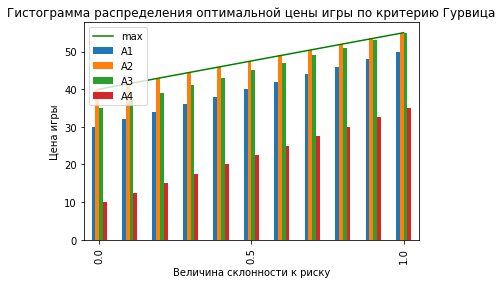

In [9]:
optimal_decision_under_conditions_of_uncertainty(["Продукты", "Косметика", "Одежда", "Бытовая химия"], ["Рецессия", "Стагнация", "Оживление", "Подъем"], np.array([
    [50, 30, 35, 45],
    [40, 40, 55, 40],
    [35, 40, 45, 55],
    [10, 20, 25, 35]
]), np.array([0.15, 0.25, 0.5, 0.1]))